In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
from shared_func import get_db_url

In [4]:
iris = data('iris')

In [5]:
iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [6]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## 1. What does the distribution of petal lengths look like?

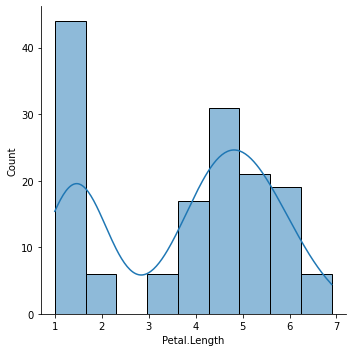

In [55]:
sns.displot(iris['Petal.Length'], kde = True)

## 2. Is there a correlation between petal length and petal width?

In [6]:
iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

Text(14.757083333333334, 0.5, 'Petal Width')

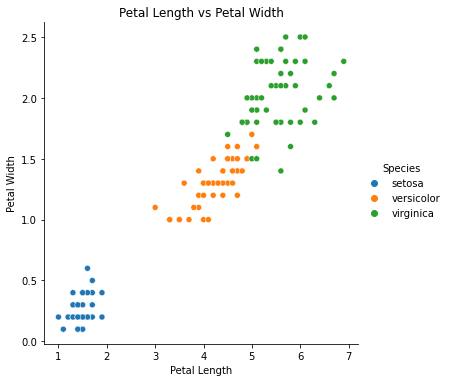

In [20]:
sns.relplot(x='Petal.Length', y='Petal.Width', hue = 'Species', data=iris)
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
# There is a correlation between petal length and petal width

## 3. Would it be reasonable to predict species based on sepal width and sepal length?

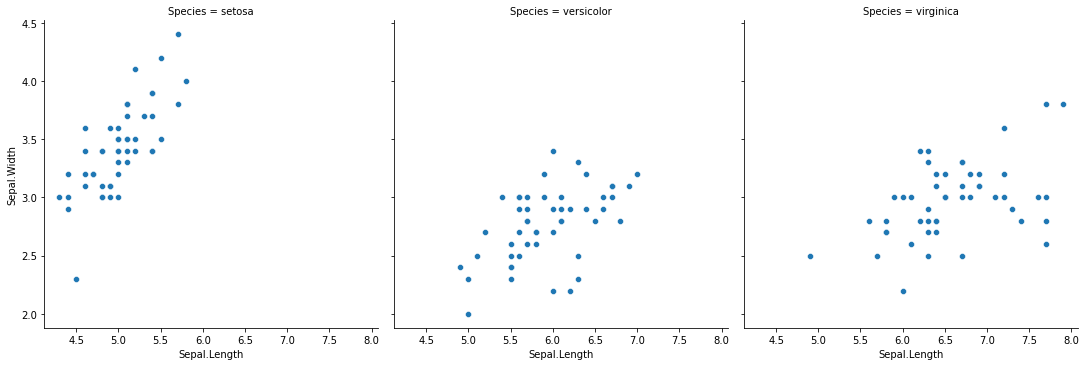

In [21]:
sns.relplot(x='Sepal.Length', y='Sepal.Width', col = 'Species',data=iris)
# somewhat reasonable as there is some correlation between sepal lengths and width and the species.However the sepal lengths of versicolor and virginica species are quite similar

## 4. Which features would be best used to predict species?

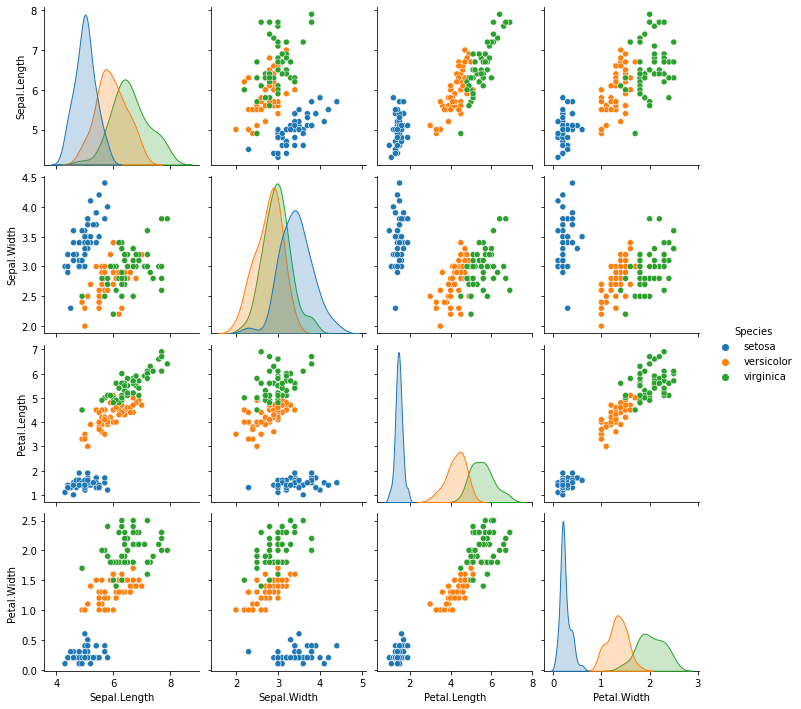

In [61]:
sns.pairplot(iris, hue = 'Species')
# best predictors of species would be petal length and width as there are distinct groups for each species

## 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [23]:
anscombe = sns.load_dataset('anscombe')
data('anscombe', show_doc= True)

anscombe

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Anscombe's Quartet of ‘Identical’ Simple Linear Regressions

### Description

Four _x_-_y_ datasets which have the same traditional statistical properties
(mean, variance, correlation, regression line, etc.), yet are quite different.

### Usage

    anscombe

### Format

A data frame with 11 observations on 8 variables.

x1 == x2 == x3

the integers 4:14, specially arranged

x4

values 8 and 19

y1, y2, y3, y4

numbers in (3, 12.5) with mean 7.5 and sdev 2.03

### Source

Tufte, Edward R. (1989) _The Visual Display of Quantitative Information_,
13–14. Graphics Press.

### References

Anscombe, Francis J. (1973) Graphs in statistical analysis. _American
Statistician_, **27**, 17–21.

### Examples

    require(stats); require(graphics)
    summary(anscombe)
    ##-- now some "magic" to do the 4 regressions in a loop:
    ff <- y ~ x
    mods <- setNames(as.list(1:4), paste0("lm", 1:4))
 

In [24]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [25]:
anscombe.groupby(['dataset']).describe()
# x mean is higher, x data is more uniform, y is more varied
# x descriptive statistics are the same for dataset I, II and III except for IV

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

<Figure size 1080x576 with 0 Axes>

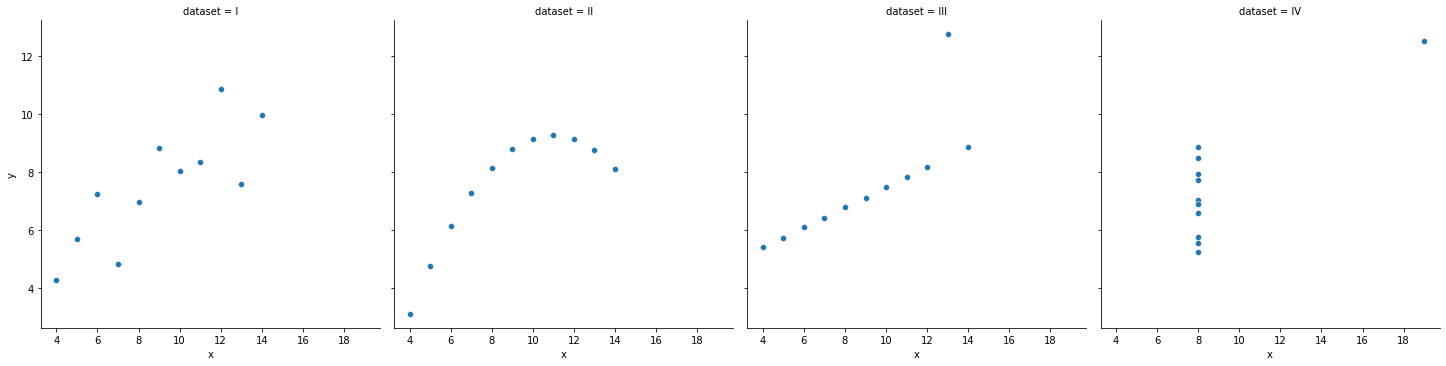

In [76]:
plt.figure(figsize= (15, 8))
sns.relplot(x='x', y='y', col = 'dataset', data=anscombe)

## 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [10]:
InsectSprays = data('InsectSprays')

In [11]:
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [14]:
InsectSprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


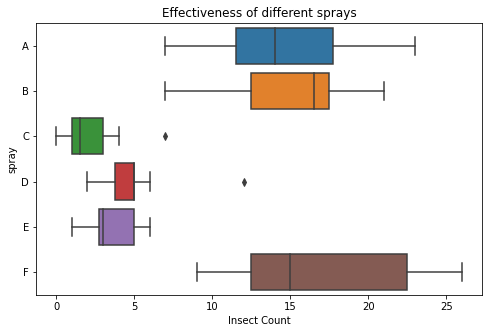

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=InsectSprays, x='count', y = 'spray')
plt.title('Effectiveness of different sprays')
plt.xlabel('Insect Count')
plt.show()

### Interpretation:
 - Spray F Insect Count most widely dispersed
 - Spray B has the highest median insect count
 - Sprays C and D have outliers
 - Lowest count is for Spray C
 - Highest count for Spray F
 - Sprays C, D, E have lower counts than Sprays A, B, F

## 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [8]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [136]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


## a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [137]:
swiss['is_catholic'] = swiss.Catholic > 60
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


## b. Does whether or not a province is Catholic influence fertility?

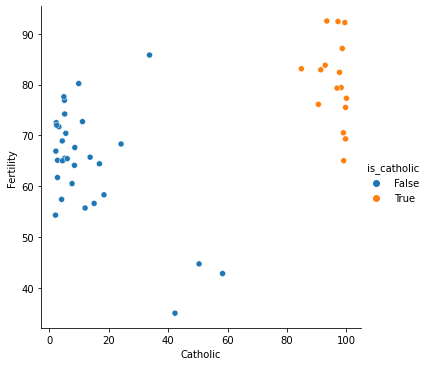

In [11]:
sns.relplot(x='Catholic', y='Fertility', hue = 'is_catholic', data=swiss)
# it looks like catholic provinces have higher fertility levels

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

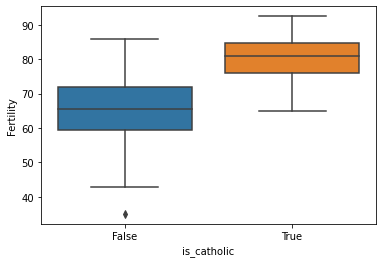

In [143]:
sns.boxplot(x='is_catholic', y='Fertility', data=swiss)

## c. What measure correlates most strongly with fertility?

In [14]:
# dropping is_catholic because it is boolean values

swiss = swiss.drop(columns = ['is_catholic'])

In [113]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [145]:
swiss.corr().Fertility.sort_values()
# Education has the highest correlation coefficient of -.66 

Education          -0.663789
Examination        -0.645883
Agriculture         0.353079
Infant.Mortality    0.416556
Catholic            0.463685
is_catholic         0.605023
Fertility           1.000000
Name: Fertility, dtype: float64

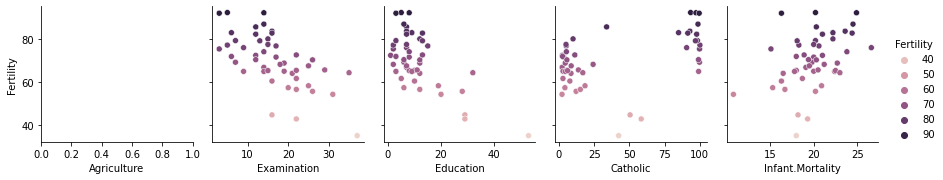

In [116]:
sns.pairplot(swiss, hue = 'Fertility',
    y_vars= 'Fertility',)

# Examination has the strongest correlation with fertility

## 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [115]:
sql_query = '''
SELECT *
FROM orders
'''

chipotle = pd.read_sql(sql_query, get_db_url('chipotle'))

In [116]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [117]:
chipotle.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [118]:
# check which items have the largest quantities ordered
best_sellers = chipotle.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [119]:
best_sellers.index
# index is the item names

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [120]:
# convert item price from object to float so it can be summed up
chipotle.item_price = chipotle.item_price.str.replace('$','').astype('float')

In [121]:
chipotle.dtypes

id                      int64
order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [122]:
most_popular = chipotle[chipotle.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum().nlargest(4, keep = 'all')

In [123]:
most_popular 
# index is item_name

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Chips and Guacamole    2201.04
Name: item_price, dtype: float64

In [124]:
# reset index to make item_name a column instead of the index
most_popular = most_popular.sort_values(ascending = False).reset_index()

In [125]:
most_popular

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0, 0.5, '')

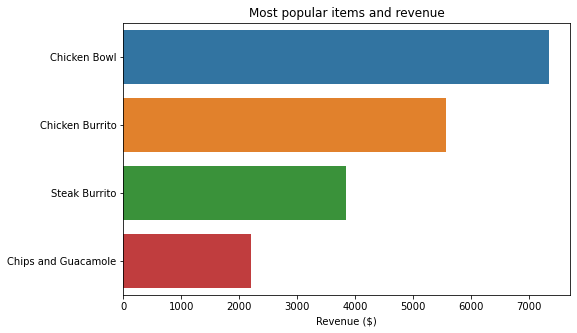

In [131]:
plt.figure(figsize = (8, 5))
sns.barplot(y= 'item_name', x ='item_price', data = most_popular)
#most_popular.plot(kind = 'barh', rot = 0)
plt.title('Most popular items and revenue')
plt.xlabel('Revenue ($)')
plt.ylabel("") # to remove the column name of item_name

## 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [18]:
sleepstudy = data('sleepstudy')

In [166]:
data('sleepstudy', show_doc =True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [19]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

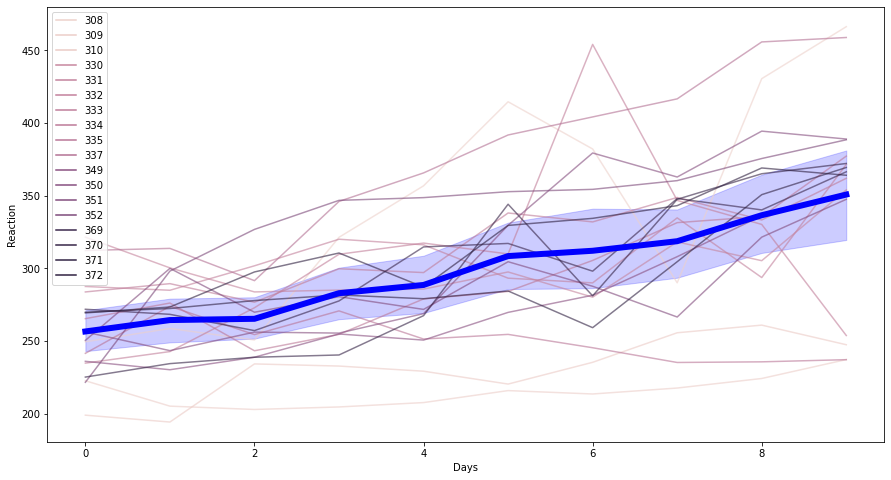

In [70]:
plt.figure(figsize= (15, 8))
sns.lineplot(y='Reaction', x='Days', hue ='Subject', data=sleepstudy, legend='full', alpha = .6)
#add more prominent line
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'blue', estimator = 'mean', alpha = 1,linewidth = 6)
